<a href="https://colab.research.google.com/github/rudeboybert/SDS390/blob/master/PS/PS02_albert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 03

Instructions:
1. Name: Kiera Murray
1. ChatGPT queries [here](https://chat.openai.com/share/e9ed41c6-8bbe-4da5-90f8-8c32ad6029cf)

Overview of this PS: You will be recreating graphs and explicitly computing values from "FPP 5 - The forecaster's toolbox" in python. Specifically

1. FPP 5.2 - Some simple forecasting methods: Recreate Fig 5.7 
2. FPP 5.4 - Residual diagnostics: Recreate the 3 components of Fig 5.13
3. FPP 5.8 - Evaluating point forecast accuracy: Recompute 4 RMSE values in table using data wrangling
4. ~~FPP 5.7 - Forecasting with decomposition: Recreate Fig 5.19 by computing all values using data wrangling~~

Overall instructions:

- Do not use a function from a specialized time series forecasting specific python library to do this PS. Rather use pandas data wrangling, matplotlib, or any other package we've used to date (like for autocorrelation functions)
- Depending on your data wrangling approach for the questions below, you *may* get a warning that says "A value is trying to be set on a copy of a slice from a DataFrame." As long as your values are correct, you may ignore this warning
- Using the lessons you learned in the 3rd DataCamp on Data Viz, Chapters 1 and 2:
    - Give all your plots titles
    - Label all axes
    - Make any other cosmetic changes you like


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Load and explore data

In [3]:
aus_production = pd.read_csv("PS03_aus_production.csv", parse_dates = ['Quarter'], index_col = 'Quarter')
print(aus_production.head())
print()
print(aus_production.tail())

            Beer
Quarter         
1992-01-01   443
1992-04-01   410
1992-07-01   420
1992-10-01   532
1993-01-01   433

            Beer
Quarter         
2009-04-01   398
2009-07-01   419
2009-10-01   488
2010-01-01   414
2010-04-01   374


# FPP 5.2: Recreate Fig 5.7

- Recall from Lec 7.2 this requires training (1992 Q1 - 2006 Q4) vs test set (2007 Q1 - 2010 Q2) splitting of data

In [4]:
# split aus_production into training data and test data
training = aus_production.loc['1992-01-01':'2006-10-01']
test = aus_production.loc['2007-01-01':'2010-10-01']

# add mean forecast and naive forecast columns to test data
test["Mean_forecast"] = training.values.mean()
test["Naive_forecast"] = training.values.take(-1)

# add seasonal naive forecast column to test data
last_quarter = training["Beer"].tail(4).values
snaive_values = []
for i in range (0, len(test)):
    index = i % len(last_quarter)
    snaive_values.append(last_quarter[index])
test["Seasonal_naive_forecast"] = snaive_values

# show test data
test

/var/folders/qc/qz8fv61s4xs8w475xp4n7d840000gn/T/ipykernel_97026/2902619930.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Mean_forecast"] = training.values.mean()
/var/folders/qc/qz8fv61s4xs8w475xp4n7d840000gn/T/ipykernel_97026/2902619930.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Naive_forecast"] = training.values.take(-1)
/var/folders/qc/qz8fv61s4xs8w475xp4n7d840000gn/T/ipykernel_97026/2902619930.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,Beer,Mean_forecast,Naive_forecast,Seasonal_naive_forecast
Quarter,,,,
2007-01-01,427,436.45,491,438
2007-04-01,383,436.45,491,386
2007-07-01,394,436.45,491,405
2007-10-01,473,436.45,491,491
2008-01-01,420,436.45,491,438
2008-04-01,390,436.45,491,386
2008-07-01,410,436.45,491,405
2008-10-01,488,436.45,491,491
2009-01-01,415,436.45,491,438


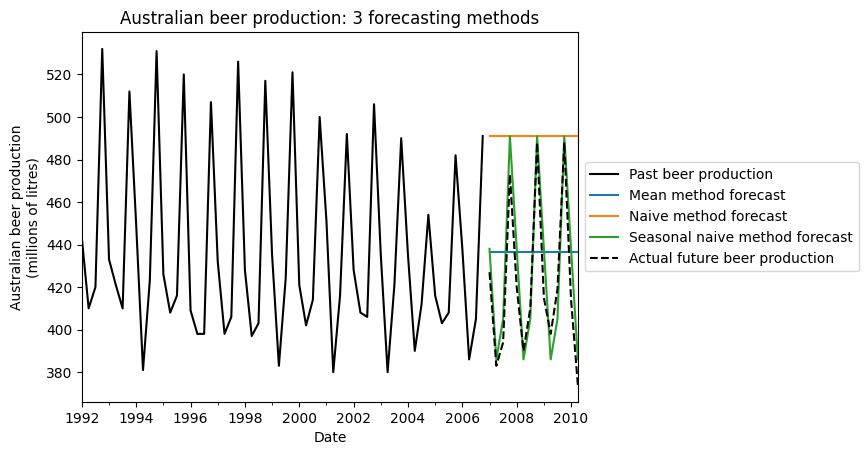

In [5]:
training["Beer"].plot(c='black', label="Past beer production")
test["Mean_forecast"].plot(label="Mean method forecast")
test["Naive_forecast"].plot(label="Naive method forecast")
test["Seasonal_naive_forecast"].plot(label="Seasonal naive method forecast")
test["Beer"].plot(c='black', label="Actual future beer production",  linestyle='dashed')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),)
plt.xlabel("Date")
plt.ylabel("Australian beer production\n(millions of litres)")
plt.title("Australian beer production: 3 forecasting methods")
plt.show()

# FPP 5.4 - Residual diagnostics: Recreate the 3 components of Fig 5.13

- Compute the three residuals diagnostics plot in Fig 5.13 for the naive method forecasts
- Do this for the training data in the Beer data above. This is because when doing a residual diagnostic of a model, you want to compare observed values $y_t$ and fitted / predicted / forecasted values $\hat{y}_t$ for the data you used to fit the model.
- It's already obvious that there are much better choices than the naive method for forecasting. For each of the three residual diagnostics plots:
    - Comment on the residuals pattern you observe
    - Explain why the pattern you observe is consistent with the fact that there are much better choices than the naive method for forecasting



In [6]:
# create naive_residuals column
test["Naive_residuals"] = test["Beer"] - test["Naive_forecast"]

/var/folders/qc/qz8fv61s4xs8w475xp4n7d840000gn/T/ipykernel_97026/1457876949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Naive_residuals"] = test["Beer"] - test["Naive_forecast"]


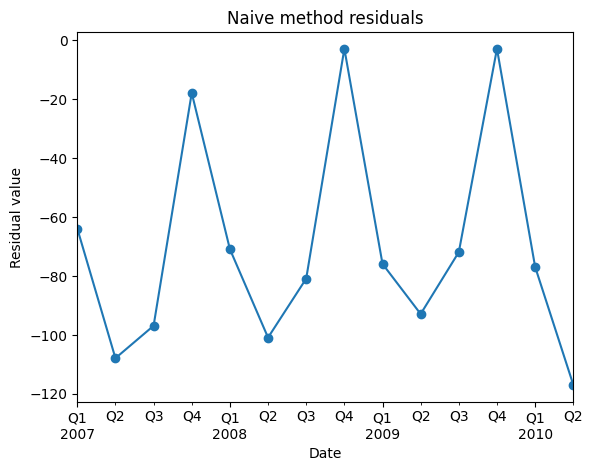

In [7]:
test["Naive_residuals"].plot()
plt.scatter(test.index, test['Naive_residuals'])
plt.xlabel('Date')
plt.ylabel('Residual value')
plt.title('Naive method residuals')
plt.show()

The naive method residuals are large, with a range of almost 100 on data whose average value is around 450, and are consistently negative. The residuals also show a clear pattern, with very high values in Q4 and low values in the other quarters (especially Q2). The residuals from a good forecast should be small, close to 0, and show no clear patterns. This plot above indicates the that naive method produces a poor forecast that is inaccurate, consistently overestimates the actual values, and fails to account for patterns in the data.

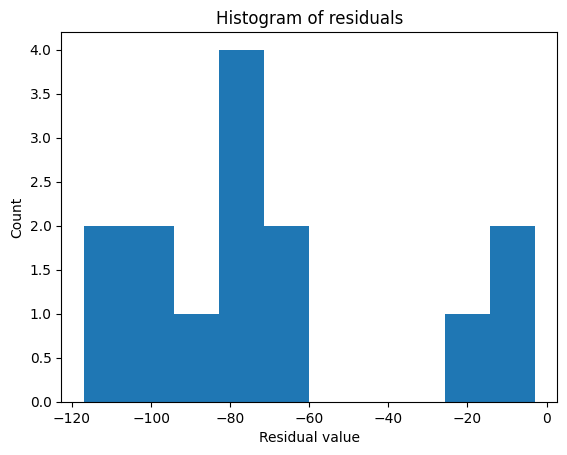

In [8]:
plt.hist(test["Naive_residuals"])
plt.xlabel('Residual value')
plt.ylabel('Count')
plt.title('Histogram of residuals')
plt.show()

Though it's hard to see with so few values spread over a large range, the naive method residuals are not normally distributed. The histogram is right-skewed, meaning that more of the residuals fall below the mean. This indicates a consistent error in the naive method's predictions, as a good forecast should have normally distributed (i.e. random) residual error.

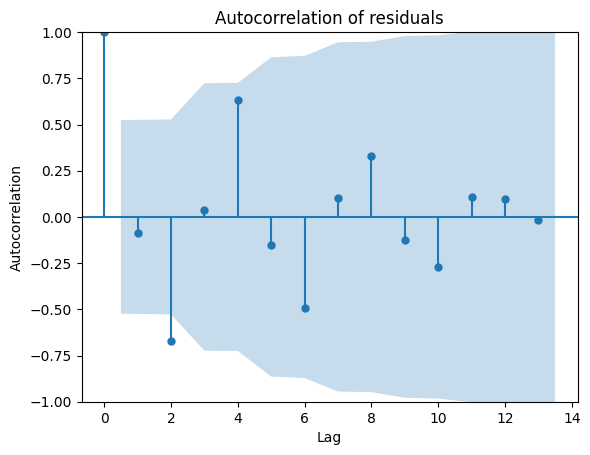

In [9]:
plot_acf(test['Naive_residuals'], lags=len(test['Naive_residuals'])-1)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of residuals')
plt.show()

The naive method residuals show stastically significant autocorrelation at lag = 2. This indicates that the residuals are not independent, which means that there is some pattern the forecast is failing to consider. The clear pattern in the autocorrelation values across increasing lags is a product of the naive method forecast not accounting for the data's seasonality.

# FPP 5.8 - Evaluating point forecast accuracy: Recompute RMSE and MAE values in table using data wrangling

For the three forecasting methods above, compute the:

- Root mean squared error
- Mean absolute error

which gives a single numerical measure of the overall error of the model. 

Note that the table in FPP 5.8 uses a slightly different training set 1992 Q1 - 2007 Q4, instead of 1992 Q1 - 2006 Q4, so you will get slightly different error values, but they should still be close.

In [10]:
# create mean_residuals and seasonal_naive_residuals columns
test["Mean_residuals"] = test["Beer"] - test["Mean_forecast"]
test["Seasonal_naive_residuals"] = test["Beer"] - test["Seasonal_naive_forecast"]

/var/folders/qc/qz8fv61s4xs8w475xp4n7d840000gn/T/ipykernel_97026/435131911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Mean_residuals"] = test["Beer"] - test["Mean_forecast"]
/var/folders/qc/qz8fv61s4xs8w475xp4n7d840000gn/T/ipykernel_97026/435131911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Seasonal_naive_residuals"] = test["Beer"] - test["Seasonal_naive_forecast"]


In [12]:
# create scores dataframe containing RMSE and MAE for the 3 residuals columns in test data
scores = pd.DataFrame({"Residuals":["Mean_residuals", "Naive_residuals", "Seasonal_naive_residuals"]})
scores.set_index("Residuals", inplace=True)
scores["RMSE"] = np.sqrt(np.square(test[scores.index]).mean()) # square root of the mean of the squared values for each column in test data
scores["RMSE"] = np.round(scores["RMSE"], 2) # round to 2 decimal places
scores["MAE"] = np.absolute(test[scores.index]).mean() # mean of the absolute values for each column in test data
scores["MAE"] = np.round(scores["MAE"], 2) # round to 2 decimal places
scores

,RMSE,MAE
Residuals,,
Mean_residuals,38.89,35.47
Naive_residuals,78.62,70.07
Seasonal_naive_residuals,13.49,11.50


# ~~FPP 5.7 - Forecasting with decomposition: Recreate Fig 5.19 by computing all values using data wrangling~~

I didn't have time to scaffold this question appropriately.